---
# Results of a Survey of the Financial Independence Subreddit: A Breakdown of Demographics and Philosophies

#### Jackie Zuker
#### March 3, 2017

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fiSurvey = pd.read_csv("/Users/jacquelynzuker/dev/Python/AlteredFISurvey.csv")
df = pd.DataFrame(fiSurvey)

%matplotlib inline


## Age Distribution of Survey Respondents
The median survey respondent was 28 years old, with a max age of 68 and a minimum age of 14. The age distribution is skewed to the left, indicating that there may be some bias present in this population. 


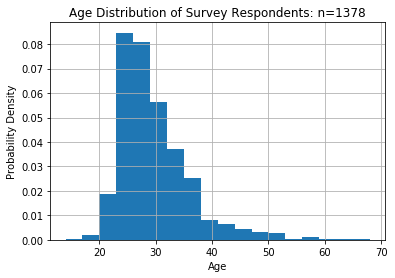

In [6]:
# Age distribution
plt.hist(df["Age"], bins=18, normed=True, stacked=False)
plt.title("Age Distribution of Survey Respondents: n=1378")
plt.xlabel("Age")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()

## Household Income Distribution
The median income was \$104,000. There were a few large outliers (\$10m+ per year) which were not displayed in order to correctly scale the boxplot. 

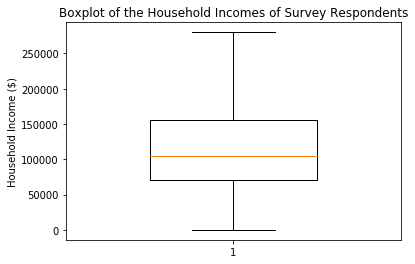

In [7]:
cleaned_df= df[np.isfinite(df["HouseholdIncome"])]
x = np.array(cleaned_df["HouseholdIncome"])
plt.boxplot(x, widths=0.5, showfliers=False)
plt.ylabel("Household Income ($)")
plt.title("Boxplot of the Household Incomes of Survey Respondents")
plt.show()

# Household Size of Survey Respondents

The data suggest that most survey respondents (~800) are unmarried without children. A smaller portion (~550) have a household size of 2, which could be a significant other or a child. Very few respondents have a household size of 3 or more (less than 20), indicating very few Financial Independence respondents are married with one or more children. 

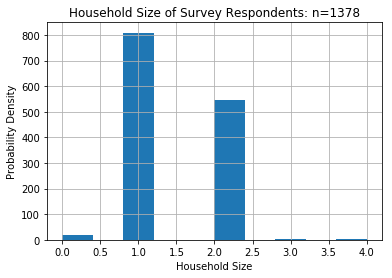

In [37]:
#plt.hist(df["HouseholdSize"], bins=18, normed=True, stacked=False)
plt.hist(df["HouseholdSize"])

plt.title("Household Size of Survey Respondents: n=1378")
plt.xlabel("Household Size")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()

# Side-by-side Comparisons of Age and Household Size Distributions

Here we see the population of investors who responded to the survey. They are primarily single adults in their mid-to-late 20's. 

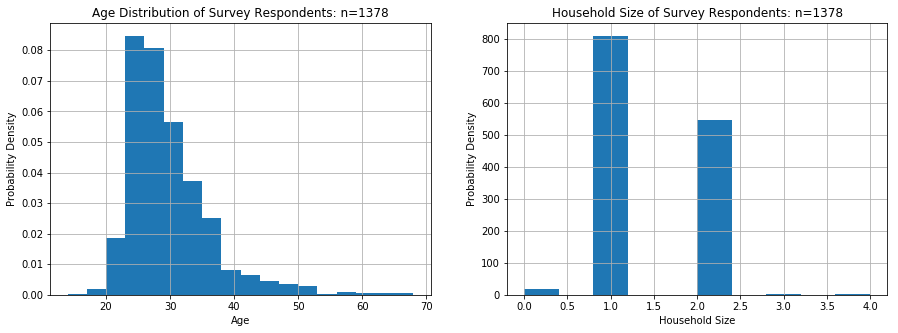

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
# Age distribution
plt.hist(df["Age"], bins=18, normed=True, stacked=False)
plt.title("Age Distribution of Survey Respondents: n=1378")
plt.xlabel("Age")
plt.ylabel("Probability Density")
plt.grid(True)


plt.subplot(1, 2, 2)

#plt.hist(df["HouseholdSize"], bins=18, normed=True, stacked=False)
plt.hist(df["HouseholdSize"])

plt.title("Household Size of Survey Respondents: n=1378")
plt.xlabel("Household Size")
plt.ylabel("Probability Density")
plt.grid(True)


plt.show()



# Investment Allocations

The group which had an investment porfolio of greater than 100k tended to have a much higher percentage of their investments in real estate and bonds. The group which had an investment portfolio of less than 100k tended to hold a greater percentage of their investments in cash. Both groups had approximately 70% of their investments in stocks. 


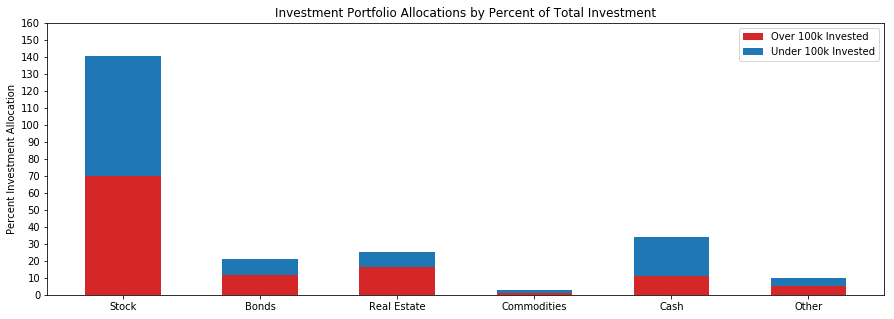

In [46]:
# a stacked bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
over100 = df[df["InvestmentPortfolioAmt"]>100000]
lesser100 = df[df["InvestmentPortfolioAmt"]<100000]


under100stock = np.mean(lesser100["PercentOfInvestmentInStock"])
over100stock = np.mean(over100["PercentOfInvestmentInStock"])

under100bonds = np.mean(lesser100["PercentOfInvestmentInBonds"])
over100bonds = np.mean(over100["PercentOfInvestmentInBonds"])

under100realestate = np.mean(lesser100["PercentOfInvestmentInRealEstate"])
over100realestate = np.mean(over100["PercentOfInvestmentInRealEstate"])

under100commodities = np.mean(lesser100["PercentOfInvestmentInCommodities"])
over100commodities = np.mean(over100["PercentOfInvestmentInCommodities"])

under100cash = np.mean(lesser100["PercentOfInvestmentInCash"])
over100cash = np.mean(over100["PercentOfInvestmentInCash"])

under100other = np.mean(lesser100["PercentOfInvestmentInOther"])
over100other = np.mean(over100["PercentOfInvestmentInOther"])

N = 6
over100Means = (over100stock, over100bonds, over100realestate, over100commodities, over100cash, over100other)
under100Means = (under100stock, under100bonds, under100realestate, under100commodities, under100cash, under100other)

ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, over100Means, width, color='#d62728')
p2 = plt.bar(ind, under100Means, width, bottom=over100Means)

plt.ylabel('Percent Investment Allocation')
plt.title('Investment Portfolio Allocations by Percent of Total Investment')
plt.xticks(ind, ('Stock', 'Bonds', 'Real Estate', 'Commodities', 'Cash', 'Other'))
plt.yticks(np.arange(0, 161, 10))
plt.legend((p1[0], p2[0]), ('Over 100k Invested', 'Under 100k Invested'))

plt.show()

